# Team ID: PTID-CDS-SEP-25-3140

  # PRCP-1015 EquackDamagePred
  1.shrikant gholap
  
  2.mangesh rathod

# To Create a predictive model in such a way that the objective is to predict the ordinal variable “damage_grade”. This column presents the level of damage grade affected by the earthquake.

In [1]:
#Importing the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

In [2]:
# Load the data
train_values = pd.read_csv('train_values.csv')
train_labels = pd.read_csv('train_labels.csv')

In [3]:
train_values.head()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,...,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,802906,6,487,12198,2,30,6,5,t,r,...,0,0,0,0,0,0,0,0,0,0
1,28830,8,900,2812,2,10,8,7,o,r,...,0,0,0,0,0,0,0,0,0,0
2,94947,21,363,8973,2,10,5,5,t,r,...,0,0,0,0,0,0,0,0,0,0
3,590882,22,418,10694,2,10,6,5,t,r,...,0,0,0,0,0,0,0,0,0,0
4,201944,11,131,1488,3,30,8,9,t,r,...,0,0,0,0,0,0,0,0,0,0


In [4]:
train_labels.head()

,building_id,damage_grade
0,802906,3
1,28830,2
2,94947,3
3,590882,2
4,201944,3


# Merge the two datasets

In [5]:
# Merge on 'building_id'
data = pd.merge(train_values, train_labels, on='building_id')
data.head()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,...,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
0,802906,6,487,12198,2,30,6,5,t,r,...,0,0,0,0,0,0,0,0,0,3
1,28830,8,900,2812,2,10,8,7,o,r,...,0,0,0,0,0,0,0,0,0,2
2,94947,21,363,8973,2,10,5,5,t,r,...,0,0,0,0,0,0,0,0,0,3
3,590882,22,418,10694,2,10,6,5,t,r,...,0,0,0,0,0,0,0,0,0,2
4,201944,11,131,1488,3,30,8,9,t,r,...,0,0,0,0,0,0,0,0,0,3


In [6]:
data.T

,0,1,2,3,4,5,6,7,8,9,...,260591,260592,260593,260594,260595,260596,260597,260598,260599,260600
building_id,802906,28830,94947,590882,201944,333020,728451,475515,441126,989500,...,560805,207683,226421,159555,827012,688636,669485,602512,151409,747594
geo_level_1_id,6,8,21,22,11,8,9,20,0,26,...,20,10,8,27,8,25,17,17,26,21
geo_level_2_id,487,900,363,418,131,558,475,323,757,886,...,368,1382,767,181,268,1335,715,51,39,9
geo_level_3_id,12198,2812,8973,10694,1488,6089,12066,12236,7219,994,...,5980,1903,8613,1537,4718,1621,2060,8163,1851,9101
count_floors_pre_eq,2,2,2,2,3,2,2,2,2,1,...,1,2,2,6,2,1,2,3,2,3
age,30,10,10,10,30,10,25,0,15,0,...,25,25,5,0,20,55,0,55,10,10
area_percentage,6,8,5,6,8,9,3,8,8,13,...,5,5,13,13,8,6,6,6,14,7
height_percentage,5,7,5,5,9,5,4,6,6,4,...,3,5,5,12,5,3,5,7,6,6
land_surface_condition,t,o,t,t,t,t,n,t,t,t,...,n,t,t,t,t,n,t,t,t,n
foundation_type,r,r,r,r,r,r,r,w,r,i,...,r,r,r,r,r,r,r,r,r,r


# Basic Checks

In [7]:
data.tail() # To show the last five rows of dataset

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,...,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
260596,688636,25,1335,1621,1,55,6,3,n,r,...,0,0,0,0,0,0,0,0,0,2
260597,669485,17,715,2060,2,0,6,5,t,r,...,0,0,0,0,0,0,0,0,0,3
260598,602512,17,51,8163,3,55,6,7,t,r,...,0,0,0,0,0,0,0,0,0,3
260599,151409,26,39,1851,2,10,14,6,t,r,...,0,0,0,0,0,0,0,0,0,2
260600,747594,21,9,9101,3,10,7,6,n,r,...,0,0,0,0,0,0,0,0,0,3


In [8]:
data.columns # To shows the all columns in dataset.

Index(['building_id', 'geo_level_1_id', 'geo_level_2_id', 'geo_level_3_id',
       'count_floors_pre_eq', 'age', 'area_percentage', 'height_percentage',
       'land_surface_condition', 'foundation_type', 'roof_type',
       'ground_floor_type', 'other_floor_type', 'position',
       'plan_configuration', 'has_superstructure_adobe_mud',
       'has_superstructure_mud_mortar_stone', 'has_superstructure_stone_flag',
       'has_superstructure_cement_mortar_stone',
       'has_superstructure_mud_mortar_brick',
       'has_superstructure_cement_mortar_brick', 'has_superstructure_timber',
       'has_superstructure_bamboo', 'has_superstructure_rc_non_engineered',
       'has_superstructure_rc_engineered', 'has_superstructure_other',
       'legal_ownership_status', 'count_families', 'has_secondary_use',
       'has_secondary_use_agriculture', 'has_secondary_use_hotel',
       'has_secondary_use_rental', 'has_secondary_use_institution',
       'has_secondary_use_school', 'has_secondary_use_i

In [9]:
data.shape # To shows how many rows and columns are in the dataset.

(260601, 40)

In [10]:
data.info() # Gives the summary of data.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260601 entries, 0 to 260600
Data columns (total 40 columns):
 #   Column                                  Non-Null Count   Dtype 
---  ------                                  --------------   ----- 
 0   building_id                             260601 non-null  int64 
 1   geo_level_1_id                          260601 non-null  int64 
 2   geo_level_2_id                          260601 non-null  int64 
 3   geo_level_3_id                          260601 non-null  int64 
 4   count_floors_pre_eq                     260601 non-null  int64 
 5   age                                     260601 non-null  int64 
 6   area_percentage                         260601 non-null  int64 
 7   height_percentage                       260601 non-null  int64 
 8   land_surface_condition                  260601 non-null  object
 9   foundation_type                         260601 non-null  object
 10  roof_type                               260601 non-null 

In [11]:
data.isnull().sum() # To show the missing values

building_id                               0
geo_level_1_id                            0
geo_level_2_id                            0
geo_level_3_id                            0
count_floors_pre_eq                       0
age                                       0
area_percentage                           0
height_percentage                         0
land_surface_condition                    0
foundation_type                           0
roof_type                                 0
ground_floor_type                         0
other_floor_type                          0
position                                  0
plan_configuration                        0
has_superstructure_adobe_mud              0
has_superstructure_mud_mortar_stone       0
has_superstructure_stone_flag             0
has_superstructure_cement_mortar_stone    0
has_superstructure_mud_mortar_brick       0
has_superstructure_cement_mortar_brick    0
has_superstructure_timber                 0
has_superstructure_bamboo       

In [12]:
data.describe() # Gives basic stats like average, max and min for each numerical columns.

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,...,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
count,2.606010e+05,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,...,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000
mean,5.256755e+05,13.900353,701.074685,6257.876148,2.129723,26.535029,8.018051,5.434365,0.088645,0.761935,...,0.033626,0.008101,0.000940,0.000361,0.001071,0.000188,0.000146,0.000088,0.005119,2.238272
std,3.045450e+05,8.033617,412.710734,3646.369645,0.727665,73.565937,4.392231,1.918418,0.284231,0.425900,...,0.180265,0.089638,0.030647,0.018989,0.032703,0.013711,0.012075,0.009394,0.071364,0.611814
min,4.000000e+00,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.611900e+05,7.000000,350.000000,3073.000000,2.000000,10.000000,5.000000,4.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,5.257570e+05,12.000000,702.000000,6270.000000,2.000000,15.000000,7.000000,5.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,7.897620e+05,21.000000,1050.000000,9412.000000,2.000000,30.000000,9.000000,6.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,1.052934e+06,30.000000,1427.000000,12567.000000,9.000000,995.000000,100.000000,32.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000


In [13]:
#To get the percentage of each damage grade in the dataset.
data['damage_grade'].value_counts(normalize=True) * 100

damage_grade
2    56.891186
3    33.468022
1     9.640792
Name: proportion, dtype: float64

Grade 2 (Medium Damage) has the tallest bar

Grade 1 (Low Damage) has a medium-height bar

Grade 3 (High Damage) has the shortest bar

Then you can conclude:

"Most buildings in the dataset experienced medium damage, followed by low damage, and the least number experienced high damage."


# Exploratory Data Analysis (EDA)

### Univariate Analysis

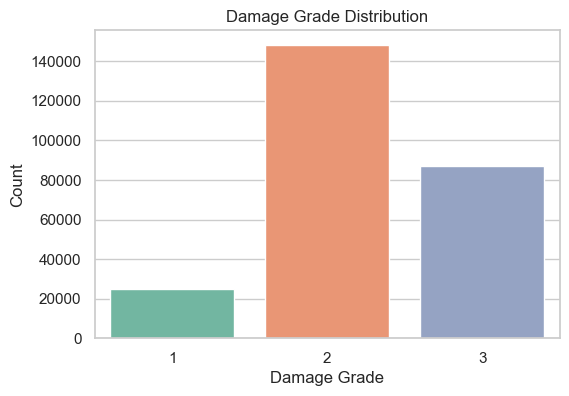

In [14]:
sns.set(style="whitegrid") # "whitegrid" adds a white background with light grey gridlines.
plt.figure(figsize=(6,4)) # sets the width to 6 inches and height to 4 inches.
sns.countplot(x='damage_grade', hue='damage_grade', data=data, palette='Set2', legend=False) 
# Applies a specific color palette (a soft and colorful one).
# To avoid duplicating the legend (since x and hue would be the same), you can set legend=False.
plt.title("Damage Grade Distribution") # Sets the title of the plot.
plt.xlabel("Damage Grade")
plt.ylabel("Count")
plt.show()

"We use Histogram + KDE plots during EDA to visually inspect the shape, spread, skewness, and outliers in each numerical feature. This is key to making smart preprocessing and modeling choices."

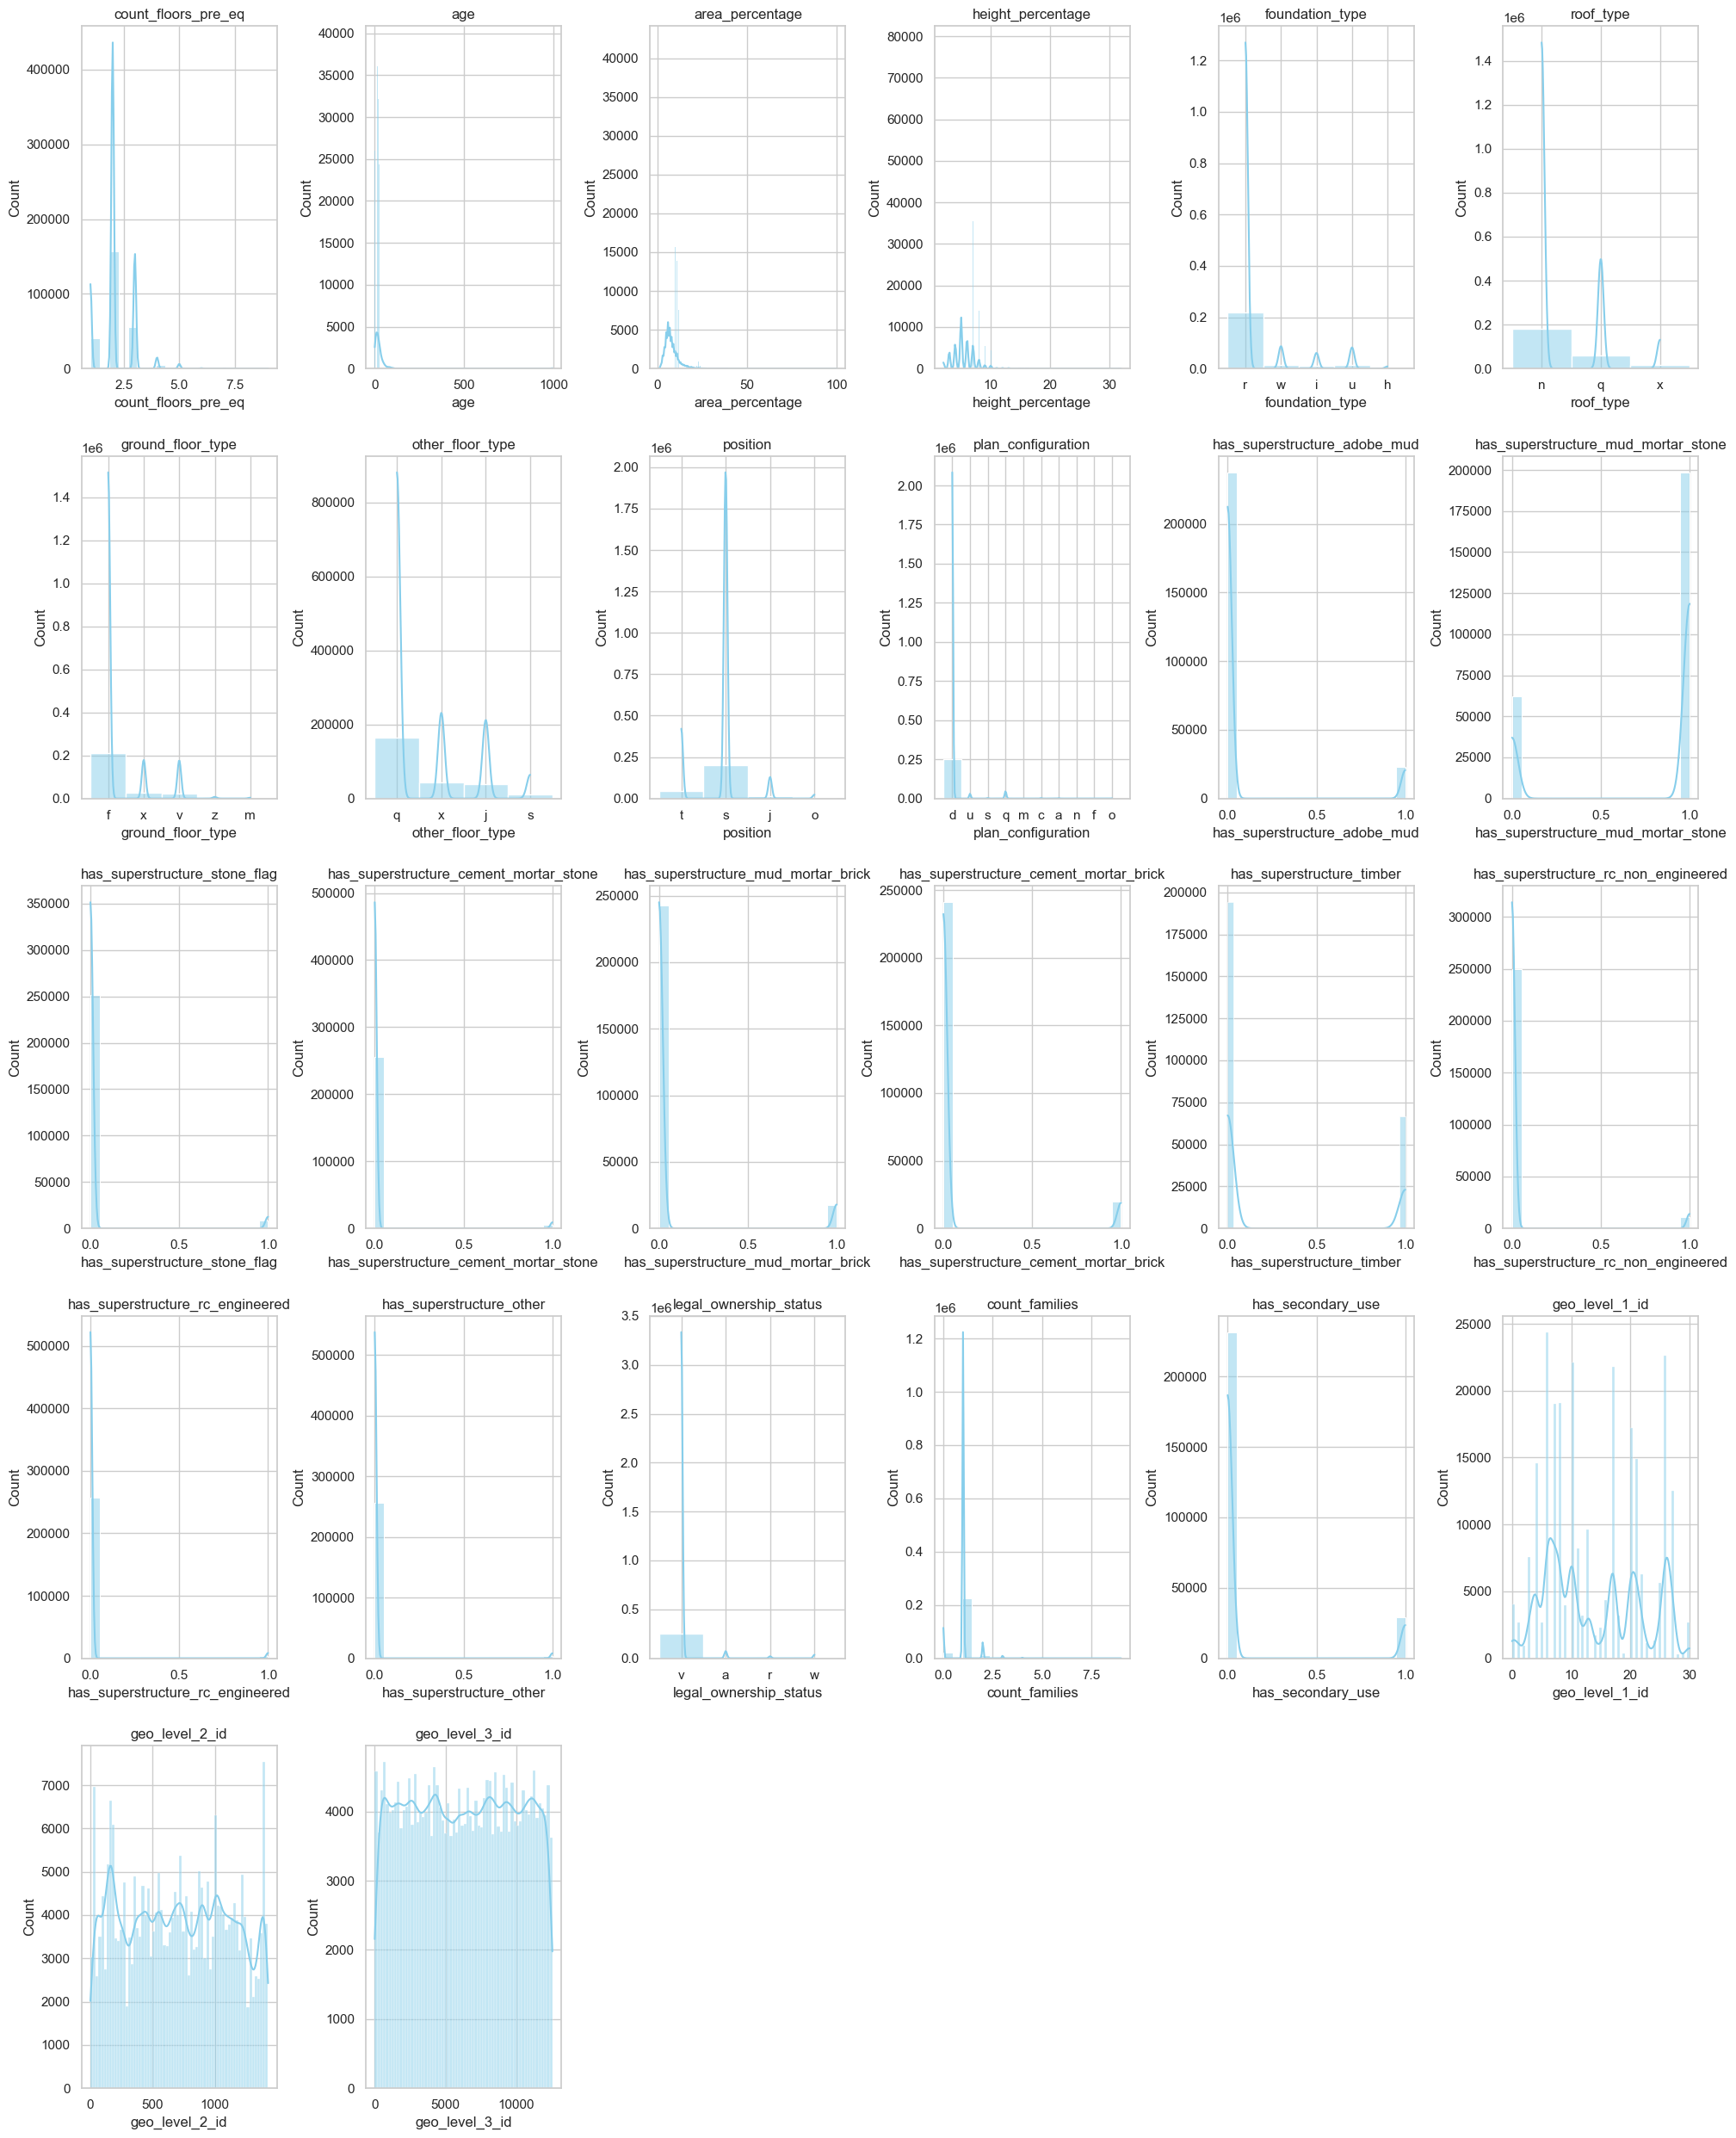

In [15]:
columns_to_plot = [
    'count_floors_pre_eq', 'age', 'area_percentage', 'height_percentage',
    'foundation_type', 'roof_type', 'ground_floor_type', 'other_floor_type',
    'position', 'plan_configuration',
    'has_superstructure_adobe_mud', 'has_superstructure_mud_mortar_stone',
    'has_superstructure_stone_flag', 'has_superstructure_cement_mortar_stone',
    'has_superstructure_mud_mortar_brick', 'has_superstructure_cement_mortar_brick',
    'has_superstructure_timber', 'has_superstructure_rc_non_engineered',
    'has_superstructure_rc_engineered', 'has_superstructure_other',
    'legal_ownership_status', 'count_families', 'has_secondary_use',
    'geo_level_1_id', 'geo_level_2_id', 'geo_level_3_id'
]

plt.figure(figsize=(20, 25))
sns.set(style="whitegrid")
plotnumber = 1

for column in columns_to_plot:
    ax = plt.subplot(5, 6, plotnumber)  # Adjust grid size if needed
    sns.histplot(x=data[column], kde=True, color='skyblue')
    plt.title(column)
    plotnumber += 1

plt.tight_layout()
plt.show()


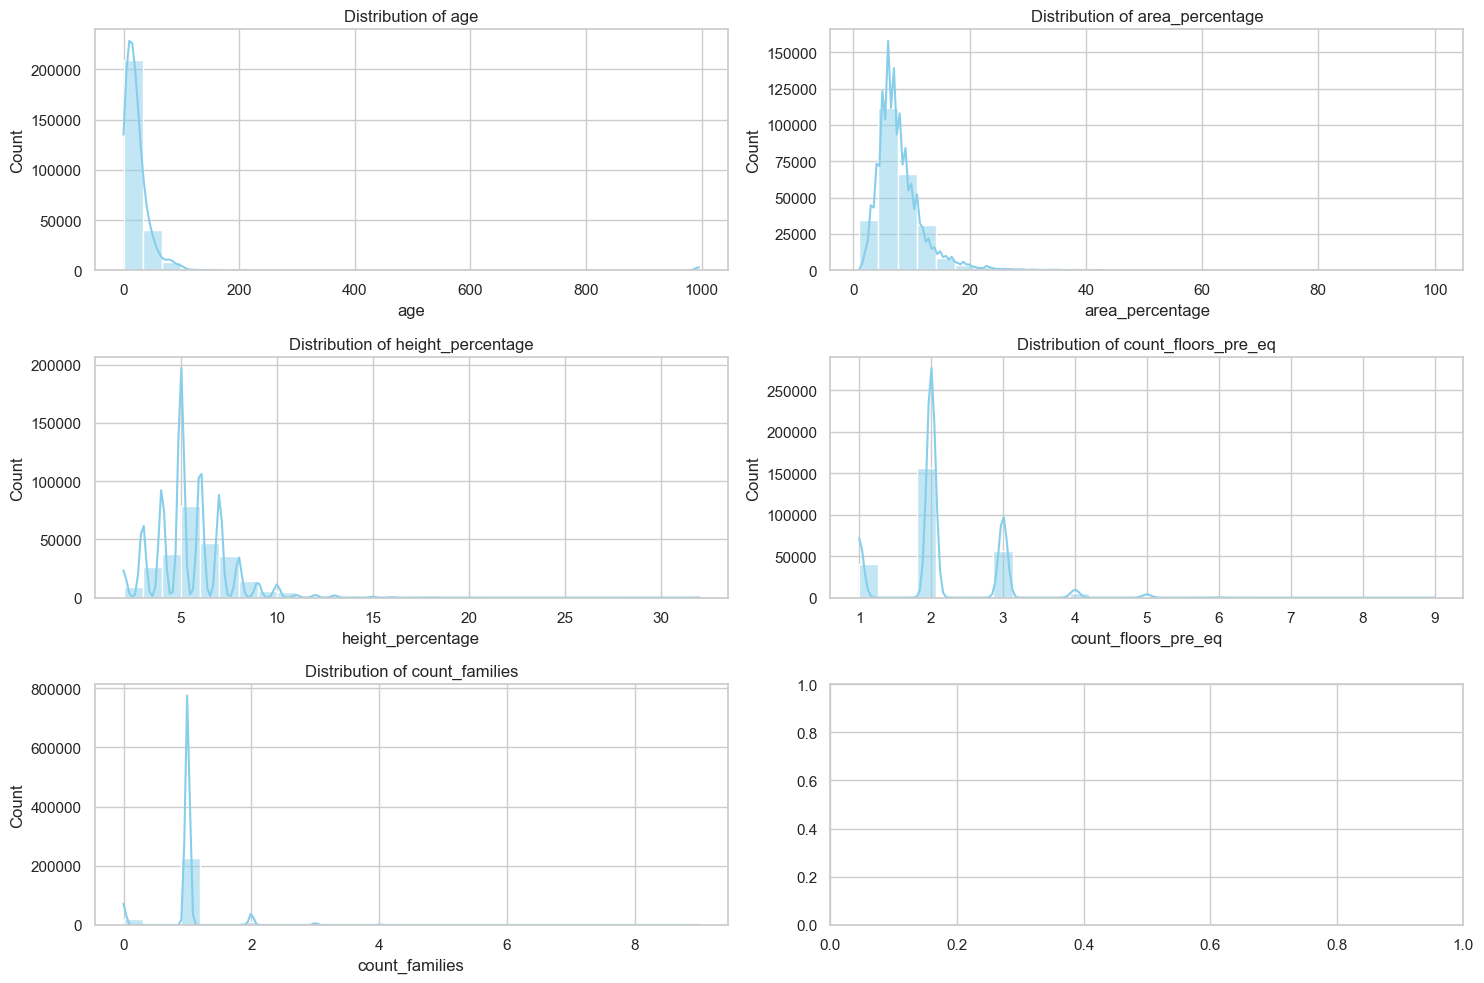

In [16]:
num_features = ['age', 'area_percentage', 'height_percentage', 'count_floors_pre_eq', 'count_families']
fig, axes = plt.subplots(3, 2, figsize=(15, 10))
axes = axes.ravel()
for i, col in enumerate(num_features):
    sns.histplot(data[col], bins=30, ax=axes[i], kde=True, color='skyblue')
    axes[i].set_title(f"Distribution of {col}")
plt.tight_layout()
plt.show()

### Bivariate Analysis

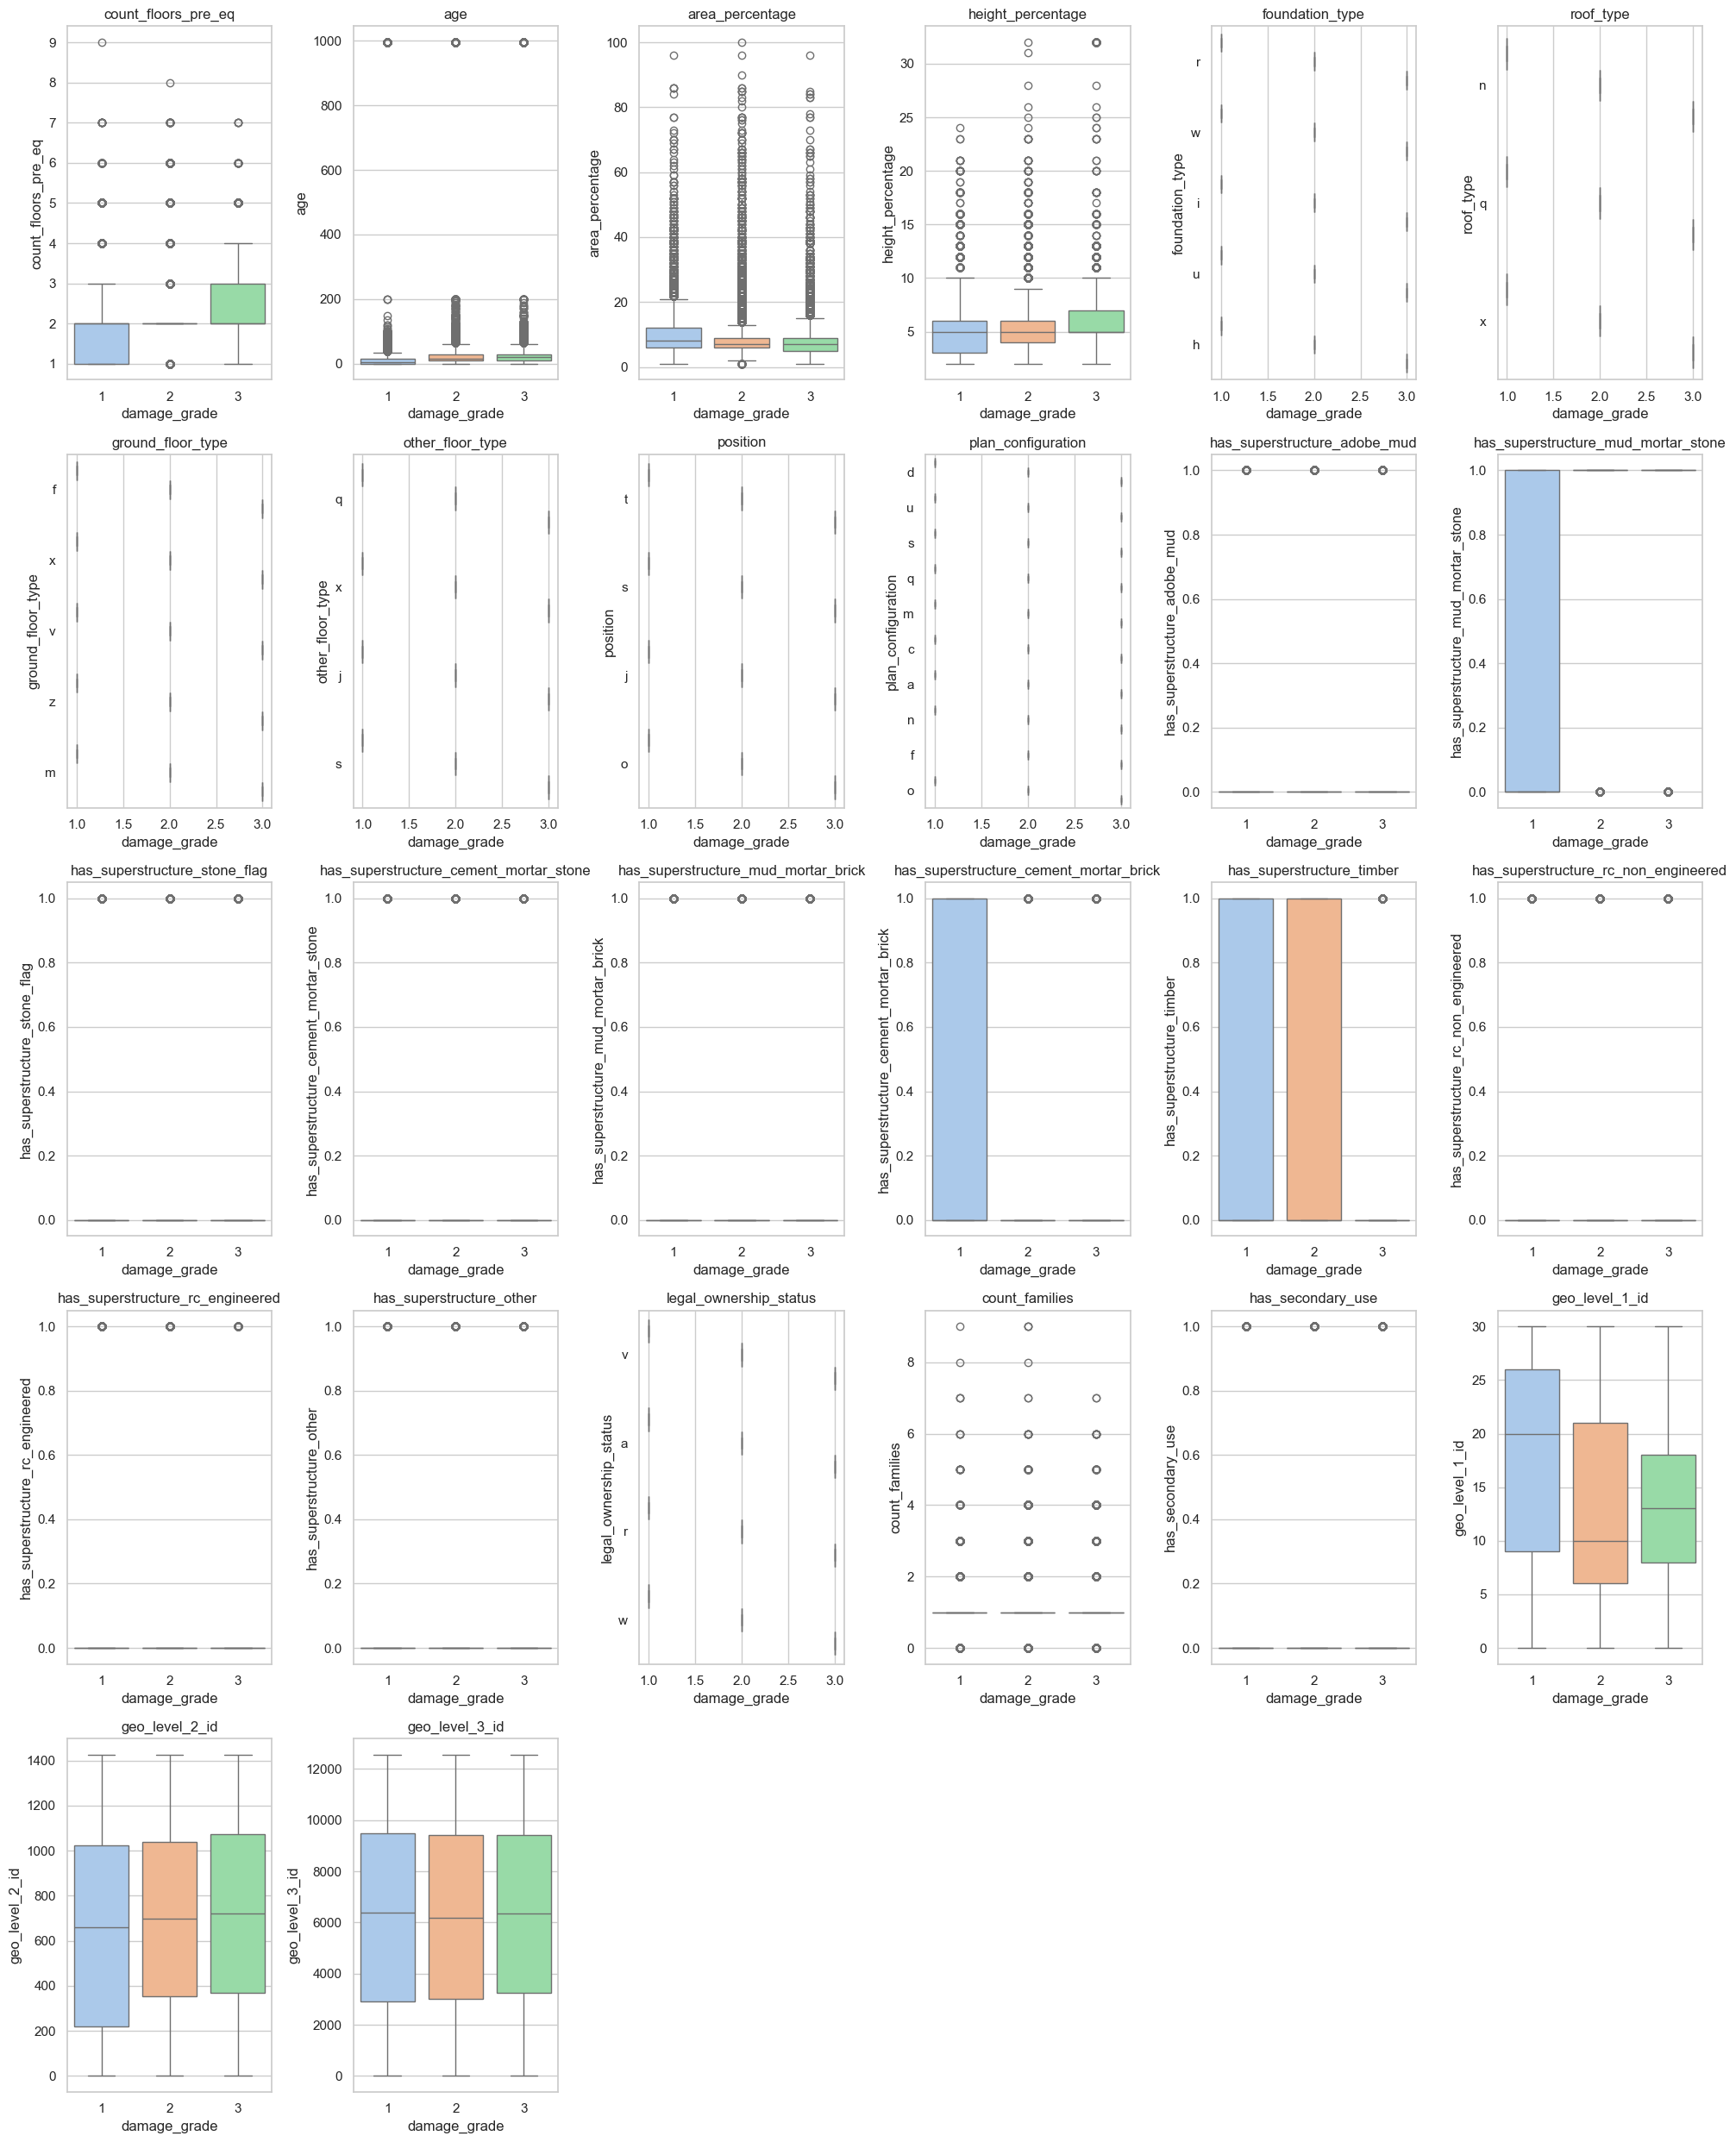

In [17]:
columns_to_plot = [
    'count_floors_pre_eq', 'age', 'area_percentage', 'height_percentage',
    'foundation_type', 'roof_type', 'ground_floor_type', 'other_floor_type',
    'position', 'plan_configuration',
    'has_superstructure_adobe_mud', 'has_superstructure_mud_mortar_stone',
    'has_superstructure_stone_flag', 'has_superstructure_cement_mortar_stone',
    'has_superstructure_mud_mortar_brick', 'has_superstructure_cement_mortar_brick',
    'has_superstructure_timber', 'has_superstructure_rc_non_engineered',
    'has_superstructure_rc_engineered', 'has_superstructure_other',
    'legal_ownership_status', 'count_families', 'has_secondary_use',
    'geo_level_1_id', 'geo_level_2_id', 'geo_level_3_id'
]

plt.figure(figsize=(20, 25))
sns.set(style="whitegrid")
plotnumber = 1

for column in columns_to_plot:
    ax = plt.subplot(5, 6, plotnumber)  # Adjust grid size if needed
    sns.boxplot(data=data, x='damage_grade', y=column, hue='damage_grade', palette='pastel', legend=False)
    plt.title(column)
    plotnumber += 1

plt.tight_layout()
plt.show()

# Data preprocessing

In [18]:
from sklearn.preprocessing import OrdinalEncoder

In [19]:
# Identify categorical columns
cat_cols = data.select_dtypes(include='object').columns

In [20]:
cat_cols

Index(['land_surface_condition', 'foundation_type', 'roof_type',
       'ground_floor_type', 'other_floor_type', 'position',
       'plan_configuration', 'legal_ownership_status'],
      dtype='object')

In [21]:
# Encode categorical features
encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
data[cat_cols] = encoder.fit_transform(data[cat_cols])

In [22]:
data.head()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,...,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
0,802906,6,487,12198,2,30,6,5,2.0,2.0,...,0,0,0,0,0,0,0,0,0,3
1,28830,8,900,2812,2,10,8,7,1.0,2.0,...,0,0,0,0,0,0,0,0,0,2
2,94947,21,363,8973,2,10,5,5,2.0,2.0,...,0,0,0,0,0,0,0,0,0,3
3,590882,22,418,10694,2,10,6,5,2.0,2.0,...,0,0,0,0,0,0,0,0,0,2
4,201944,11,131,1488,3,30,8,9,2.0,2.0,...,0,0,0,0,0,0,0,0,0,3


In [23]:
data.info(
    
)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260601 entries, 0 to 260600
Data columns (total 40 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   building_id                             260601 non-null  int64  
 1   geo_level_1_id                          260601 non-null  int64  
 2   geo_level_2_id                          260601 non-null  int64  
 3   geo_level_3_id                          260601 non-null  int64  
 4   count_floors_pre_eq                     260601 non-null  int64  
 5   age                                     260601 non-null  int64  
 6   area_percentage                         260601 non-null  int64  
 7   height_percentage                       260601 non-null  int64  
 8   land_surface_condition                  260601 non-null  float64
 9   foundation_type                         260601 non-null  float64
 10  roof_type                               2606

In [24]:
data[cat_cols] = data[cat_cols].astype(int)


In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260601 entries, 0 to 260600
Data columns (total 40 columns):
 #   Column                                  Non-Null Count   Dtype
---  ------                                  --------------   -----
 0   building_id                             260601 non-null  int64
 1   geo_level_1_id                          260601 non-null  int64
 2   geo_level_2_id                          260601 non-null  int64
 3   geo_level_3_id                          260601 non-null  int64
 4   count_floors_pre_eq                     260601 non-null  int64
 5   age                                     260601 non-null  int64
 6   area_percentage                         260601 non-null  int64
 7   height_percentage                       260601 non-null  int64
 8   land_surface_condition                  260601 non-null  int32
 9   foundation_type                         260601 non-null  int32
 10  roof_type                               260601 non-null  int32
 11  

In [26]:
# Separate features and target
X = data.drop(['damage_grade', 'building_id'], axis=1)
y = data['damage_grade']

In [27]:
X

,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,...,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,6,487,12198,2,30,6,5,2,2,0,...,0,0,0,0,0,0,0,0,0,0
1,8,900,2812,2,10,8,7,1,2,0,...,0,0,0,0,0,0,0,0,0,0
2,21,363,8973,2,10,5,5,2,2,0,...,0,0,0,0,0,0,0,0,0,0
3,22,418,10694,2,10,6,5,2,2,0,...,0,0,0,0,0,0,0,0,0,0
4,11,131,1488,3,30,8,9,2,2,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260596,25,1335,1621,1,55,6,3,0,2,0,...,0,0,0,0,0,0,0,0,0,0
260597,17,715,2060,2,0,6,5,2,2,0,...,0,0,0,0,0,0,0,0,0,0
260598,17,51,8163,3,55,6,7,2,2,1,...,0,0,0,0,0,0,0,0,0,0
260599,26,39,1851,2,10,14,6,2,2,2,...,0,0,0,0,0,0,0,0,0,0


In [28]:
y

0         3
1         2
2         3
3         2
4         3
         ..
260596    2
260597    3
260598    3
260599    2
260600    3
Name: damage_grade, Length: 260601, dtype: int64

# Feature Selection

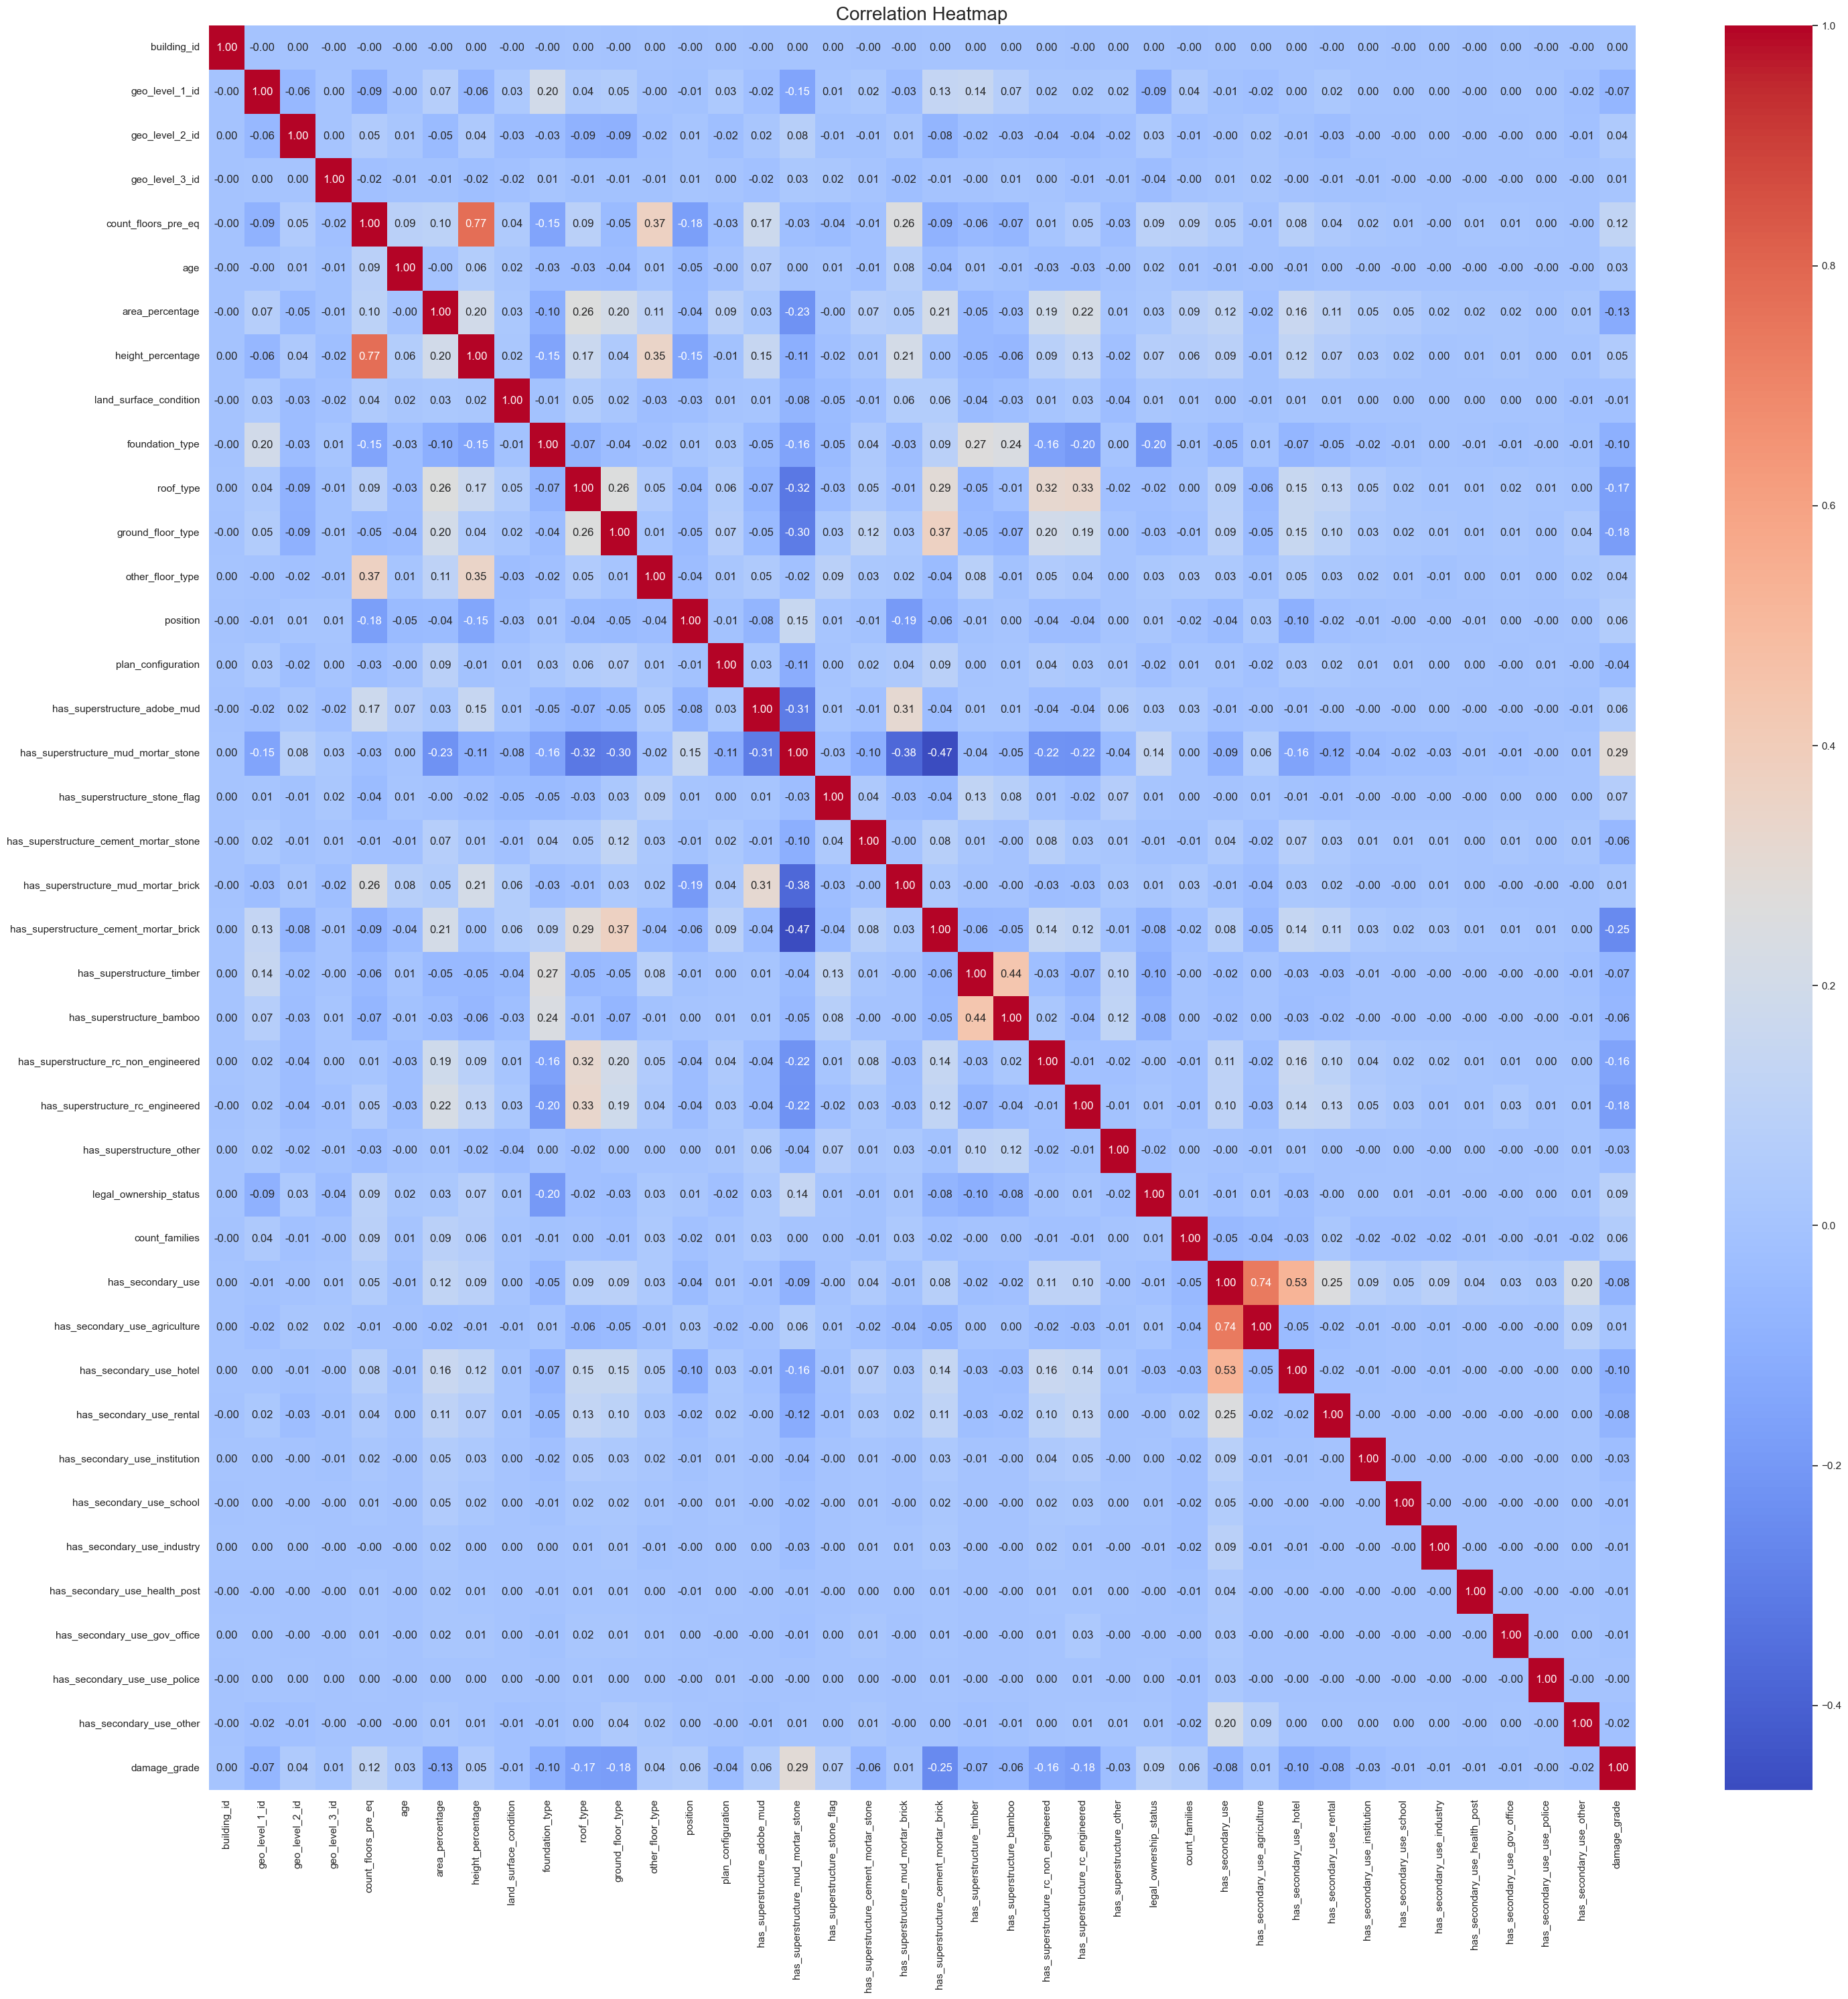

In [29]:
plt.figure(figsize=(30, 30))
sns.heatmap(
    data.corr(numeric_only=True), 
    cmap='coolwarm', 
    annot=True,         # Show values
    fmt=".2f",          # Format to 2 decimal places
    annot_kws={"size": 12}  # Adjust annotation font size
)
plt.title("Correlation Heatmap", fontsize=20)
plt.tight_layout()
plt.show()

# Train-Test-Split

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

In [32]:
X_train

,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,...,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
185461,21,935,5965,3,20,6,6,2,2,0,...,0,0,0,0,0,0,0,0,0,0
190537,3,1229,1099,2,20,6,5,2,2,0,...,0,0,0,0,0,0,0,0,0,0
232781,21,1219,2705,3,45,6,5,2,2,1,...,0,0,0,0,0,0,0,0,0,0
213004,20,158,2452,2,10,7,5,2,4,1,...,0,0,0,0,0,0,0,0,0,0
177786,9,670,5977,2,0,9,6,2,1,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99791,8,1184,830,1,10,6,5,2,2,0,...,0,0,0,0,0,0,0,0,0,0
150155,4,144,5751,2,0,8,4,2,2,1,...,0,0,0,0,0,0,0,0,0,0
112797,27,548,1119,3,20,19,7,2,2,1,...,0,0,0,0,0,0,0,0,0,0
225588,17,1030,606,2,15,8,8,2,2,0,...,0,0,0,0,0,0,0,0,0,0


In [33]:
X_test

,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,...,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
124536,6,1350,3790,3,60,12,8,0,2,1,...,0,0,0,0,0,0,0,0,0,0
112152,20,863,11793,1,20,5,4,0,4,0,...,0,0,0,0,0,0,0,0,0,0
93613,20,214,10569,1,0,6,3,2,2,0,...,0,0,0,0,0,0,0,0,0,0
204895,25,745,2704,1,25,7,3,2,2,0,...,0,0,0,0,0,0,0,0,0,0
37356,27,390,5640,2,30,12,6,2,2,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133525,4,334,9226,3,10,6,7,0,2,0,...,0,0,0,0,0,0,0,0,0,0
76613,8,145,9862,2,0,10,5,2,2,0,...,0,1,0,0,0,0,0,0,0,0
43696,25,725,5436,2,20,8,5,0,2,0,...,0,0,0,0,0,0,0,0,0,0
1822,5,601,3024,2,35,6,4,1,2,0,...,0,0,0,0,0,0,0,0,0,0


In [34]:
# Create new features
X_train['floor_height_ratio'] = X_train['height_percentage'] / (X_train['count_floors_pre_eq'] + 1)
X_test['floor_height_ratio'] = X_test['height_percentage'] / (X_test['count_floors_pre_eq'] + 1)


In [35]:
# Check new features
X_train[['height_percentage', 'count_floors_pre_eq', 'floor_height_ratio']].head()

,height_percentage,count_floors_pre_eq,floor_height_ratio
185461,6,3,1.500000
190537,5,2,1.666667
232781,5,3,1.250000
213004,5,2,1.666667
177786,6,2,2.000000


# Scale Numerical Features

In [36]:
from sklearn.preprocessing import StandardScaler

In [37]:
scaler= StandardScaler()
X_train= scaler.fit_transform(X_train)
X_test= scaler.transform(X_test)

In [38]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)  # if you're predicting on test data


# Data balancing perform by using SMOTE

In [39]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
X_train_bal, y_train_bal = sm.fit_resample(X_train, y_train_encoded)
X_test_bal, y_test_bal = sm.fit_resample(X_test, y_test_encoded)


# Model Creation And Model Evaluation

# Logistic Regression

In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score,classification_report# to check model performance
from sklearn.metrics import roc_auc_score, roc_curve
LR=LogisticRegression( random_state=42)
LR.fit(X_train_bal, y_train_bal)

LogisticRegression(random_state=42)

In [41]:
#prediction on testing data
y_pred = LR.predict(X_test_bal)

In [42]:
# Evaluation testing data
print(classification_report(y_test_bal, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.67      0.72     29652
           1       0.47      0.33      0.39     29652
           2       0.50      0.71      0.59     29652

    accuracy                           0.57     88956
   macro avg       0.58      0.57      0.56     88956
weighted avg       0.58      0.57      0.56     88956



# Random Forest

In [43]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [44]:
# Train a baseline Random Forest
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train_bal, y_train_bal)


RandomForestClassifier(random_state=42)

In [45]:
#prediction on training data
y_pred = clf.predict(X_train_bal)

In [46]:
# Evaluation training data
print(classification_report(y_train_bal, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    118607
           1       0.99      0.99      0.99    118607
           2       0.99      0.99      0.99    118607

    accuracy                           0.99    355821
   macro avg       0.99      0.99      0.99    355821
weighted avg       0.99      0.99      0.99    355821



In [47]:
#prediction on testing data
y_pred = clf.predict(X_test_bal)

In [48]:
# Evaluation testing data
print(classification_report(y_test_bal, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.83      0.86     29652
           1       0.69      0.78      0.74     29652
           2       0.77      0.72      0.74     29652

    accuracy                           0.78     88956
   macro avg       0.78      0.78      0.78     88956
weighted avg       0.78      0.78      0.78     88956



In [49]:
from sklearn.model_selection import cross_val_score, StratifiedKFold

# Use StratifiedKFold for balanced folds, and reduce number of folds to 3 for speed
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

# Limit parallel jobs to avoid memory issues
scores = cross_val_score(clf, X_train_bal, y_train_bal, cv=cv, scoring='f1_macro', n_jobs=1)

# Output average F1 score
print("Average CV F1 Score:", scores.mean())



Average CV F1 Score: 0.8191105542456123


CROSS VALIDATION CHECK RESION
Get a robust, reliable performance estimate,
Avoid overfitting,
Compare models fairly, Better class balance check
Make sure performance is good across all classes, not just the majority one.

# XG Boost

In [50]:
from xgboost import XGBClassifier


In [51]:
xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(X_train_bal, y_train_bal)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [52]:
y_pred_xgb = xgb_model.predict(X_test_bal)

In [53]:
print("XGBoost Classification Report:")
print(classification_report(y_test_bal, y_pred_xgb))

XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.86      0.87     29652
           1       0.72      0.81      0.76     29652
           2       0.78      0.71      0.74     29652

    accuracy                           0.79     88956
   macro avg       0.80      0.79      0.79     88956
weighted avg       0.80      0.79      0.79     88956



# Hyperparameter Tuning & Final Model

In [54]:
from sklearn.model_selection import GridSearchCV,StratifiedKFold

In [55]:

param_grid = {
    'n_estimators': [100],           # Fix or reduce first
    'max_depth': [3, 5],             # Avoid very deep trees early
    'learning_rate': [0.1, 0.2]      # Skip very small rates first
}

# Use StratifiedKFold for better class balance across folds
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

# Use n_jobs=-1 for parallel processing, and enable verbosity for progress
grid_search = GridSearchCV(
    XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='mlogloss'),
    param_grid,
    cv=cv,
    scoring='f1_macro',
    n_jobs=-1,
    verbose=1
)

# Fit the model
grid_search.fit(X_train_bal, y_train_bal)

# Get the best model
best_xgb_model = grid_search.best_estimator_

print("Best Parameters:", grid_search.best_params_)


Fitting 3 folds for each of 4 candidates, totalling 12 fits


C:\Users\Admin\anaconda3\anaconda\Lib\site-packages\xgboost\training.py:199: UserWarning: [13:59:35] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Best Parameters: {'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 100}


In [56]:
# Final evaluation
y_final_pred = best_xgb_model.predict(X_test_bal)
print(classification_report(y_test_bal, y_pred_xgb))

              precision    recall  f1-score   support

           0       0.88      0.86      0.87     29652
           1       0.72      0.81      0.76     29652
           2       0.78      0.71      0.74     29652

    accuracy                           0.79     88956
   macro avg       0.80      0.79      0.79     88956
weighted avg       0.80      0.79      0.79     88956

